# checks the CAMS_OPI Dataset and plots maps

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt

In [32]:
import os
from glob import glob

In [33]:
import numpy as np 
import xray

### get the list of files (converted in NetCDF)

In [34]:
dpath = os.path.join(os.environ['HOME'], 'data/cams_opi')

In [35]:
lfiles = sorted(glob(os.path.join(dpath, 'nc/cams_opi_merged.??????.nc'))) 

### open the files, and concatenates along the time dimension

In [36]:
dset = [xray.open_dataset(f) for f in lfiles]

In [37]:
dset = xray.concat(dset, 'time')

In [38]:
dset

<xray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 435)
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 23.75 26.25 ...
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 -78.75 -76.25 -73.75 -71.25 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 1979-04-01 ...
Data variables:
    xxxx     (time, lat, lon) float32 -0.347137 -0.346976 -0.351653 -0.350524 ...
    cams     (time, lat, lon) float32 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
    camsn    (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    gam      (time, lat, lon) float32 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 ...
    comba    (time, lat, lon) float32 -0.287305 -0.287001 -0.288495 -0.278568 ...
    comb     (time, lat, lon) float32 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
    opi      (time, lat, lon) float32 0.265028 0.262622 0.264594 0.261457 0.255884 ...

### calculates the climatology over the 1981 - 2010 period and saves it to file

In [39]:
climatology = dset.sel(time=slice('1981','2010')).groupby('time.month').mean('time')

In [40]:
climatology.to_netcdf(os.path.join(dpath, 'nc/climatology_cams_opi_1981_2010.nc'))

### calculates the anomalies

In [41]:
anoms = dset.groupby('time.month') - climatology

In [42]:
anoms

<xray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 435)
Coordinates:
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 -78.75 -76.25 -73.75 -71.25 ...
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 23.75 26.25 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 1979-04-01 ...
    month    (time) int32 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 ...
Data variables:
    comb     (time, lat, lon) float32 -0.307065 -0.306348 -0.307001 -0.297382 ...
    xxxx     (time, lat, lon) float32 -0.307065 -0.306348 -0.307002 -0.297382 ...
    cams     (time, lat, lon) float32 -0.29841 -0.298113 -0.299873 -0.288759 ...
    camsn    (time, lat, lon) float32 -0.466667 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    gam      (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    comba    (time, lat, lon) float32 -0.307065 -0.306348 -0.307002 -0.297382 ...
    opi      (time, lat, lon) floa

### compares the anomalies (calculated with original anoms contained in CAMS_OPI)

In [43]:
def plot_field(X, lats, lons, vmin, vmax, step, cmap=plt.get_cmap('jet'), ax=False, title=False, grid=False):
    if not ax: 
        f, ax = plt.subplots(figsize=(10, (X.shape[0] / float(X.shape[1])) * 10))
    m.ax = ax
    im = m.contourf(lons, lats, X, np.arange(vmin, vmax+step, step), latlon=True, cmap=cmap, extend='both', ax=ax)
    m.drawcoastlines()
    if grid: 
        m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,0,1])
        m.drawparallels([-40, 0, 40], labels=[1,0,0,0])
    m.colorbar(im)
    if title: 
        ax.set_title(title)

In [44]:
from mpl_toolkits.basemap import Basemap as bm

In [45]:
m = bm(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,\
            lat_ts=0,resolution='c')

In [46]:
lons, lats = np.meshgrid(dset['lon'].values, dset['lat'].values)

### plots the anomalies that we just calculated WRT 1981 - 2010 *normal*

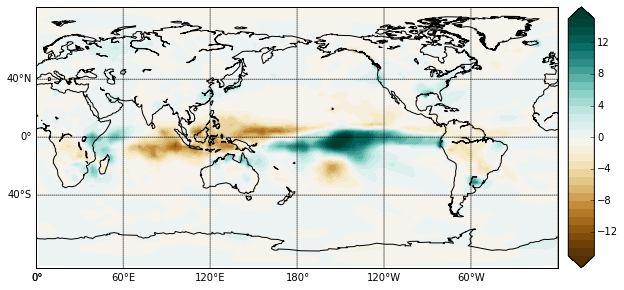

In [47]:
plot_field(anoms.sel(time='1998-01')['comb'].squeeze(), \
           lats, lons, -15, 15, 1, grid=True, cmap=plt.get_cmap('BrBG'))

### plots the anomalies available in the original dataset (climatology is 1979-2000)

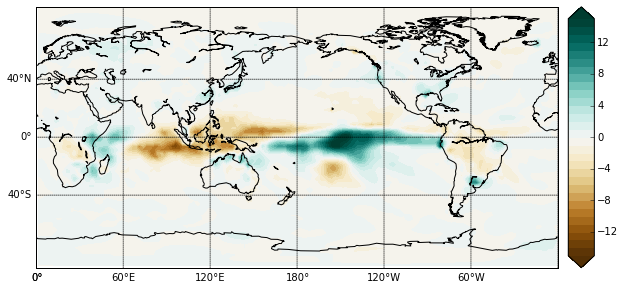

In [48]:
plot_field(dset.sel(time='1998-01')['comba'].squeeze(), \
           lats, lons, -15, 15, 1, grid=True, cmap=plt.get_cmap('BrBG'))

### plots the differences

In [49]:
diffs = dset.sel(time='1998-01')['comba'].squeeze()\
-anoms.sel(time='1998-01')['comb'].squeeze()


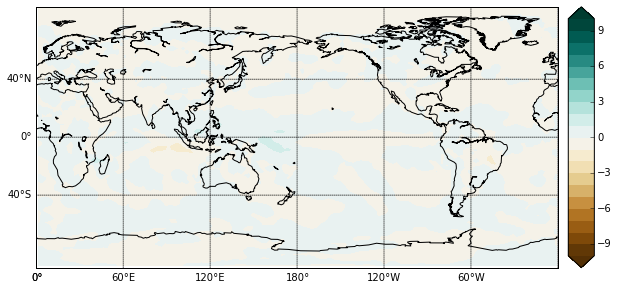

In [50]:
plot_field(diffs, lats, lons, -10, 10, 1, grid=True, cmap=plt.get_cmap('BrBG'))

### plots the latest anomalies

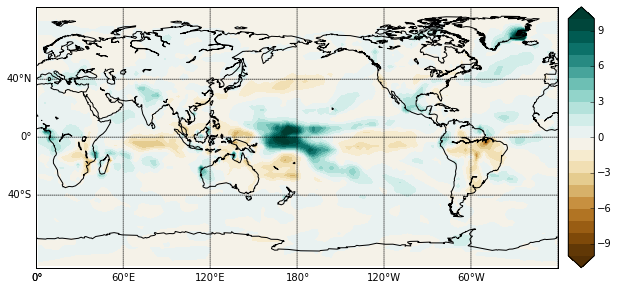

In [51]:
plot_field(anoms.sel(time='2015-03')['comb'].squeeze(), \
           lats, lons, -10, 10, 1, grid=True, cmap=plt.get_cmap('BrBG'))

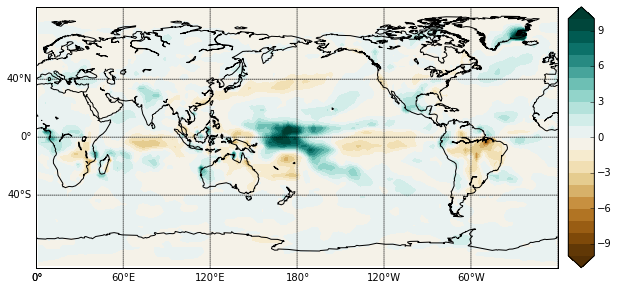

In [52]:
plot_field(dset.sel(time='2015-03')['comba'].squeeze(), \
           lats, lons, -10, 10, 1, grid=True, cmap=plt.get_cmap('BrBG'))

### compares with what is available on the [IRI website](http://iridl.ldeo.columbia.edu/maproom/Global/Precipitation/Anomaly.html)

#### note that the anomalies (and raw data) are expressed in mm/month below, rather than mm/day

![IRI anomalies](http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.CAMS_OPI/.v0208/.anomaly/.prcp/T/%28days%20since%201960-01-01%29streamgridunitconvert/T/differential_mul/T/%28months%20since%201960-01-01%29streamgridunitconvert//units/%28mm/month%29def/prcp_anomaly_max500_colors2//long_name/%28Precipitation%20Anomaly%29def/DATA/-500/-450/-400/-350/-300/-250/-200/-150/-100/-50/-25/25/50/100/150/200/250/300/350/400/450/500/VALUES/prcp_anomaly_max500_colors2+X+Y+fig-+colors+%7C+thin+grey+contours+black+thin+solid+coasts+countries+-fig+//aprod/-500/500/plotrange/T/last/plotvalue/X/-20/340/plotrange/Y/-65/75/plotrange+//plotborder+72+psdef//antialias+true+psdef//plotaxislength+700+psdef//XOVY+null+psdef//color_smoothing+null+psdef+.jpg?plotaxislength=820)